In [16]:
!./scripts/csx_tut1_sigmat_melanoma.sh

setting up CIBERSORTx in directory:
/mnt/buckets/liulab/csx-runs/20210806_200738
/mnt/buckets/liulab/csx-runs/20210806_200738
├── [   0]  in
│   └── [ 88M]  myrefsample.txt
└── [   0]  out

2 directories, 1 file
>Running CIBERSORTxFractions...
>[Options] username: lyronctk@stanford.edu
>[Options] token: dfeba2c8b9d61daebee5fa87026b8e56
>[Options] single_cell: TRUE
>[Options] refsample: myrefsample.txt
>[Options] replicates: 5
>[Options] sampling: 0.5
>[Options] fraction: 0.75
>[Options] k.max: 999
>[Options] q.value: 0.01
>[Options] G.min: 300
>[Options] G.max: 500
>[Options] filter: FALSE
>[Options] verbose: TRUE
>[Options] QN: FALSE
>Making reference sample file.
>Making phenotype class file.
>==========Signature Matrix Settings============
>Pure samples file: /src/outdir//CIBERSORTx_myrefsample_inferred_refsample.txt
>Phenotype classes file: /src/outdir//CIBERSORTx_myrefsample_inferred_phenoclasses.txt
>Minimum number of DEGs to consider from each phenotype for signature matrix set 

#  

In [1]:
import os

import numpy as np
import pandas as pd

In [2]:
np.set_printoptions(precision=6, suppress=True)

# load sigmat generated locally

In [3]:
# csx_run_path = "/mnt/buckets/liulab/csx-runs/20210806_173723/"
csx_run_path = "/mnt/buckets/liulab/csx-runs/20210806_200738/"

In [4]:
!tree -h $csx_run_path

/mnt/buckets/liulab/csx-runs/20210806_200738/
├── [   0]  in
│   └── [ 88M]  myrefsample.txt
└── [   0]  out
    ├── [3.8M]  CIBERSORTx_cell_type_sourceGEP.txt
    ├── [172K]  CIBERSORTx_myrefsample_inferred_phenoclasses.CIBERSORTx_myrefsample_inferred_refsample.bm.K999.pdf
    ├── [510K]  CIBERSORTx_myrefsample_inferred_phenoclasses.CIBERSORTx_myrefsample_inferred_refsample.bm.K999.txt
    ├── [ 725]  CIBERSORTx_myrefsample_inferred_phenoclasses.txt
    └── [ 18M]  CIBERSORTx_myrefsample_inferred_refsample.txt

2 directories, 6 files


## `refsample` (scRNA-seq, input, normalized to 100k)

In [5]:
path = os.path.join(csx_run_path, "in", "myrefsample.txt")

refsample = pd.read_csv(
    #     "/mnt/buckets/liulab/csx_example_files/Single_Cell_RNA-Seq_Melanoma_SuppFig_3b-d/scRNA-Seq_reference_melanoma_Tirosh_SuppFig_3b-d.txt",
    path,
    sep="\t",
    index_col=0,
)
refsample

,Malignant,Malignant.1,Malignant.2,Malignant.3,Malignant.4,Malignant.5,Malignant.6,Malignant.7,Malignant.8,Malignant.9,...,B cells.55,B cells.56,B cells.57,B cells.58,B cells.59,B cells.60,B cells.61,B cells.62,B cells.63,B cells.64
Gene,,,,,,,,,,,,,,,,,,,,,
C9orf152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RPS11,135.788203,153.354101,296.923889,283.818688,313.256767,323.528192,292.029073,320.594740,148.106568,168.636169,...,222.851783,620.452365,308.307928,969.846904,214.314251,418.579389,263.184131,327.511485,321.778349,840.663649
ELMO2,0.000000,13.149704,0.357997,5.159017,0.000000,0.927005,4.695806,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.274004,0.000000,7.250034,9.348143,0.886994,0.000000,0.000000
CREB3L1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PNMA1,1.780029,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.870904,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PIK3IP1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.345004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SNRPD2,56.004346,25.364048,82.975699,51.746373,171.888728,91.655197,71.564901,66.761786,82.349405,137.131639,...,0.000000,0.000000,69.063930,0.000000,0.000000,23.430306,45.850742,65.312089,28.601533,5.083915
SLC39A6,30.710748,17.722485,17.310509,6.795816,12.853705,7.719830,28.671377,2.438073,6.099906,7.051737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.554878,0.000000,0.000000,0.000000


In [6]:
refsample.sum()

Malignant       99994.705851
Malignant.1     99999.581863
Malignant.2     99999.019897
Malignant.3    100000.346693
Malignant.4    100000.310939
                   ...      
B cells.60      99993.519589
B cells.61     100008.687798
B cells.62      99981.828372
B cells.63     100003.407537
B cells.64      99998.084747
Length: 737, dtype: float64

notes...
* 242 malignant cells


## `signature_matrix` (rows: subset of genes; columns: cell types; values: gene expression)

In [7]:
path = os.path.join(
    csx_run_path,
    "out",
    "CIBERSORTx_myrefsample_inferred_phenoclasses.CIBERSORTx_myrefsample_inferred_refsample.bm.K999.txt",
)

signature_matrix = pd.read_csv(path, sep="\t", index_col=0)

signature_matrix

,Malignant,Endothelial cells,CAF,T cells CD8,NK cells,Macrophages,T cells CD4,B cells
NAME,,,,,,,,
A2M,281.650610,293.077009,1.000000,1.000000,1.000000,874.318085,1.000000,1.000000
A4GALT,1.000000,56.578233,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
AARSD1,47.530952,1.000000,29.752152,1.000000,1.000000,1.000000,1.000000,1.000000
ABCA1,1.000000,83.750607,1.000000,1.000000,1.000000,125.979638,1.000000,1.000000
ABCB5,117.846844,1.000000,1.000000,21.130258,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...
ZRSR2,1.000000,1.000000,1.000000,34.301794,69.883443,1.000000,1.000000,1.000000
ZSCAN12,1.000000,1.000000,1.000000,25.889644,1.000000,1.000000,1.000000,19.428974
ZSCAN16,1.000000,1.000000,1.000000,1.000000,212.109844,1.000000,1.000000,1.000000


note: not normalized

In [8]:
signature_matrix.sum()

Malignant            112227.904103
Endothelial cells    180058.694079
CAF                  191579.039925
T cells CD8          142701.460412
NK cells             184688.438798
Macrophages          289085.104688
T cells CD4          113441.891656
B cells              158786.177483
dtype: float64

condition number:

In [9]:
np.linalg.cond(signature_matrix)

14.993428726348656

In [10]:
a = signature_matrix.values

In [11]:
a_normed = a / np.linalg.norm(a, axis=0)

In [12]:
u, s, vh = np.linalg.svd(a)
print(u.shape, s.shape, vh.shape)
print(s)
print(s[0] / s[-1])

(3082, 3082) (8,) (8, 8)
[54923.788972 21996.706121 19393.14457  18719.872381 13544.547939
 12085.160056  7783.512079  3663.19072 ]
14.993428726348657


## `inferred_refsample` - a subsampling of `refsample`

In [13]:
path = os.path.join(
    csx_run_path, "out", "CIBERSORTx_myrefsample_inferred_refsample.txt"
)

inferred_refsample = pd.read_csv(path, sep="\t", index_col=0)
inferred_refsample

,Malignant,Malignant.1,Malignant.2,Malignant.3,Malignant.4,Endothelial.cells,Endothelial.cells.1,Endothelial.cells.2,Endothelial.cells.3,Endothelial.cells.4,...,T.cells.CD4,T.cells.CD4.1,T.cells.CD4.2,T.cells.CD4.3,T.cells.CD4.4,B.cells,B.cells.1,B.cells.2,B.cells.3,B.cells.4
GeneSymbol,,,,,,,,,,,,,,,,,,,,,
C9orf152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RPS11,2389.121012,2473.138547,2450.985066,2601.227390,2574.440390,1798.273398,1810.111554,1479.353869,1668.873545,1643.851529,...,3818.545009,3753.442604,3598.457983,3733.306958,3778.161263,4522.165221,4186.272486,4328.896609,4415.759099,4191.587741
ELMO2,36.787060,38.177417,29.509392,31.878847,29.920483,0.000000,0.000000,0.000000,0.000000,0.000000,...,50.587901,57.231438,56.326701,68.367666,52.119903,0.000000,0.000000,0.000000,0.000000,0.000000
CREB3L1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PNMA1,32.171857,28.358245,34.288279,41.494309,34.359138,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PIK3IP1,0.000000,0.000000,0.000000,0.000000,0.000000,218.552116,128.951002,209.840955,116.826308,50.482179,...,554.699818,650.507553,626.774161,488.921821,551.494530,248.352240,115.239278,274.321108,242.996845,233.107988
SNRPD2,542.655956,613.807801,543.677639,599.397393,580.642215,281.455744,460.097805,388.563387,243.715207,384.967483,...,417.054930,398.184133,428.484693,429.150880,505.598076,415.119278,341.606564,416.849055,439.560771,357.250202
SLC39A6,117.736676,118.268985,114.779728,117.643206,119.856068,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
print("normalized to a million?")

all(np.isclose(inferred_refsample.sum(), 1000000.0))

normalized to a million?


True

what are the columns in `inferred_refsample`? are they individual cells here?

how about i pick a column in `inferred_refsample` and see if i can find any columns in `refsample` with the same expression values...

In [15]:
inferred_refsample[["Malignant"]]

,Malignant
GeneSymbol,
C9orf152,0.000000
RPS11,2389.121012
ELMO2,36.787060
CREB3L1,0.000000
PNMA1,32.171857
...,...
PIK3IP1,0.000000
SNRPD2,542.655956
SLC39A6,117.736676


In [16]:
refsample_normalized_per_million = refsample * 1_000_000 / refsample.sum()

In [17]:
# RPS11	2389.121012	2473.138547	2450.985066	2601.227390	2574.440390

abs(
    refsample_normalized_per_million.loc["RPS11", "Malignant":"Malignant.241"]
    - 2389.121012
).sort_values()

Malignant.22        3.774086
Malignant.71        4.077653
Malignant.228       4.439385
Malignant.66        8.501237
Malignant.154      23.745853
                    ...     
Malignant.219    2396.241671
Malignant.198    2409.317067
Malignant.170    2460.332622
Malignant.216    2819.287087
Malignant.237    3190.831289
Name: RPS11, Length: 242, dtype: float64

In [18]:
refsample_normalized_per_million[
    ["Malignant.22", "Malignant.71", "Malignant.228", "Malignant.66"]
]

,Malignant.22,Malignant.71,Malignant.228,Malignant.66
Gene,,,,
C9orf152,0.000000,0.000000,0.000000,0.000000
RPS11,2385.346926,2385.043359,2384.681627,2380.619775
ELMO2,0.000000,68.337038,0.000000,0.000000
CREB3L1,0.000000,0.000000,0.000000,0.000000
PNMA1,0.000000,31.081305,0.000000,0.000000
...,...,...,...,...
PIK3IP1,0.000000,0.000000,74.198305,0.000000
SNRPD2,712.482581,590.422698,198.126749,790.839117
SLC39A6,223.441826,112.541590,61.467702,17.601108


## `inferred_phenoclasses` - cell type of each column in `inferred_refsample`

In [19]:
path = os.path.join(
    csx_run_path, "out", "CIBERSORTx_myrefsample_inferred_phenoclasses.txt"
)

pd.read_csv(path, sep="\t", header=None, index_col=0)

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
0,,,,,,,,,,,,,,,,,,,,,
Malignant,1,1,1,1,1,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Endothelial cells,2,2,2,2,2,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
CAF,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
T cells CD8,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
NK cells,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Macrophages,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
T cells CD4,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,2,2,2,2,2
B cells,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,1,1,1,1,1


## `sourceGEP` / `source_gep` - not sure how this is derived from `inferred_refsample`

In [20]:
path = os.path.join(csx_run_path, "out", "CIBERSORTx_cell_type_sourceGEP.txt")

source_gep = pd.read_csv(path, sep="\t", index_col=0)
source_gep

,Malignant,Endothelial cells,CAF,T cells CD8,NK cells,Macrophages,T cells CD4,B cells
genesymbols,,,,,,,,
A1BG,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
A1BG.AS1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
A1CF,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
A2M,281.650610,293.077009,1.000000,1.000000,1.000000,874.318085,1.000000,1.000000
A2M.AS1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...
ZYG11A,1.000000,1.000000,1.000000,20.081341,21.764111,1.000000,20.854023,15.891761
ZYG11B,11.307604,10.359142,13.658274,13.886973,1.000000,1.000000,16.282670,23.543443
ZYX,24.422050,96.887107,436.180339,109.809728,160.308666,187.369420,87.349279,1.000000


In [21]:
source_gep.sum()

Malignant            1.020290e+06
Endothelial cells    1.023310e+06
CAF                  1.024009e+06
T cells CD8          1.023686e+06
NK cells             1.042856e+06
Macrophages          1.018462e+06
T cells CD4          1.024198e+06
B cells              1.023099e+06
dtype: float64

## visualize...

In [22]:
9 - signature_matrix.rank(axis=1)

,Malignant,Endothelial cells,CAF,T cells CD8,NK cells,Macrophages,T cells CD4,B cells
NAME,,,,,,,,
A2M,3.0,2.0,6.0,6.0,6.0,1.0,6.0,6.0
A4GALT,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0
AARSD1,1.0,5.5,2.0,5.5,5.5,5.5,5.5,5.5
ABCA1,5.5,2.0,5.5,5.5,5.5,1.0,5.5,5.5
ABCB5,1.0,5.5,5.5,2.0,5.5,5.5,5.5,5.5
...,...,...,...,...,...,...,...,...
ZRSR2,5.5,5.5,5.5,2.0,1.0,5.5,5.5,5.5
ZSCAN12,5.5,5.5,5.5,1.0,5.5,5.5,5.5,2.0
ZSCAN16,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0


In [25]:
import plotly.io

plotly.io.renderers.default = "jupyterlab+png"

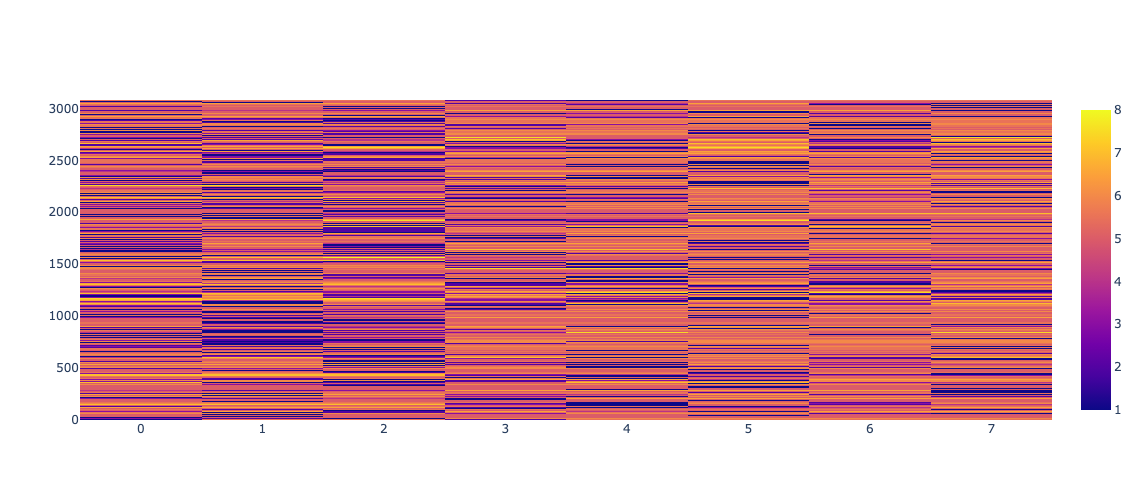

In [26]:
import plotly.graph_objects as go

df = 9 - signature_matrix.rank(axis=1)

fig = go.Figure(data=go.Heatmap(z=df.values))

fig.show()